<a href="https://colab.research.google.com/github/Pakhi27/Image-Recognition-Model-AI-Hotdog-Detector-pyTorch/blob/main/Image_Recognition_Model_AI_Hotdog_Detector_pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Train an Image Recognition Model

In [ ]:
! pip install --upgrade torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
# Now, let's proceed to check if this environment has a compatible GPU model or not:
from torch.cuda import is_available, get_device_name

if is_available():
    print(f"The environment has a compatible GPU ({get_device_name()}) available.")
else:
    print(f"The environment does NOT have a compatible GPU model available.")

The environment does NOT have a compatible GPU model available.


In [ ]:
# Set Up Your Dataset

In [ ]:
# The provided code defines a function called imshow that takes a PyTorch Tensor as input and displays it as an image
# from numpy import clip: Imports the clip function from the NumPy library. This function is used to limit the values in an array to a specific range.
from numpy import clip
from matplotlib import pyplot as plt
from torch import Tensor

def imshow(inp: Tensor) -> None:
    """Imshow for Tensor."""

    # Converts the input tensor inp from PyTorch tensor format to a NumPy array format.
    inp = inp.cpu().numpy()

    #  Transposes the order of the dimensions in the NumPy array. Images typically have channels (RGB) as the last dimension, but PyTorch might have a different default order. This ensures channels are in the expected format (height, width, channels).
    inp = inp.transpose((1, 2, 0))

    # These values likely represent the average values of each color channel (RGB) in the dataset the model was trained on.
    mean = array([0.485, 0.456, 0.406])
    std = array([0.229, 0.224, 0.225])

    # Applies normalization to the image
    inp = std * inp + mean

    # Clips the values in the inp array to be between 0 and 1. Image data typically has pixel intensities in this range. This ensures the values are suitable for visualization by Matplotlib.
    inp = clip(inp, 0, 1)
    plt.imshow(inp)
    plt.show()

In [ ]:
# Load Your Dataset
# Next, we'll create a HotdogDataset class. This class will download the dataset if needed, transform it based on the parameters we input, and match the images in the dataset to a label: hotdog or not hotdog.

In [ ]:
"""
Hotdog/Not Hotdog training data.
"""
# This code defines a class called HotDogDataset that inherits from the Dataset class in PyTorch's torch.utils.data module. This class is designed to specifically handle a dataset containing images labeled as "hotdog" or "not hotdog."
# class HotDogDataset(Dataset):: Defines a class named HotDogDataset that inherits functionalities from the Dataset class provided by PyTorch for working with datasets.

import os
from typing import Tuple
from zipfile import ZipFile
from PIL import Image

from numpy import array
from pandas import read_csv
from requests import get
from torch.utils.data import Dataset


class HotDogDataset(Dataset):
    """
    Child class of torch.utils.data.Dataset.

    This is a wrapper for mapping from hotdog/not hotdog images to the target.
    """
# def __init__(self, dir_name, transform=None) -> None:: Initializes the HotDogDataset class. It takes two arguments:
# dir_name: This is a string representing the name of the directory containing the dataset files (images and labels).
# transform (optional): This argument allows you to specify a transformation function to be applied to the images during loading.
    def __init__(self, dir_name, transform=None) -> None:
        """
        Initialise a HotdogDataset class

        :param dir_name: The name of the folder holding the data.
        :param transform:
        """
        self.transform = transform
        # Download, save and extract the data if needed.
        if not os.path.isdir(os.path.join(os.getcwd(), f"{dir_name}")):
            r = get(
                f"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/hotdog-not-hotdog/data/{dir_name}.zip")
            f = open(os.path.join(os.getcwd(), f"{dir_name}.zip"), mode="wb+")
            f.write(r.content)
            f.close()
            with ZipFile(os.path.join(os.getcwd(), f"{dir_name}.zip"), 'r') as zip_ref:
                zip_ref.extractall("./")
                zip_ref.close()
        # Load the metadata.

        self.data = read_csv(os.path.join(os.getcwd(), dir_name, f"{dir_name}_labels.csv"))
        # Number of classes.
        # The code calculates the number of unique labels in the y column of the loaded data (self.data['y']). This represents the number of classes (hotdog or not hotdog in this case) present in the dataset. The result is stored in self.n_classes.
        self.n_classes = len(self.data['y'].unique())

    def __len__(self) -> int:
        """
        :return: The length of the training/testing dataset.
        """
        return len(self.data)
#  It takes an index (idx) as input and is responsible for returning a data point (image and label) at that specific index.
    def __getitem__(self, idx) -> Tuple[array, str]:
        """
        Return the input and target at a specific index of the dataset.

        :param idx: The index of the data to be returned.
        :return: Key-value pair at the specified index.
        """
        # Open the corresponding Image.

        image = Image.open(os.path.join(os.getcwd(), self.data.loc[idx, 'file_name']))
        # Retrieve the label.

        y = self.data.loc[idx, 'y']
        # Transform the image if necessary.

        if self.transform is not None:
            image_ = self.transform(image)
            image.close()
        else:
            image_ = array(image)
            image.close()
        return image_, y


In [ ]:
# Create a Training Framework¶

In [ ]:
"""
A training framework for classification tasks.
"""

from copy import deepcopy
from typing import List, Tuple
from os.path import join
from os import getcwd

from matplotlib.pyplot import subplots, show
from numpy import sum
from torch import argmax, device, cuda, save, load
from torch.nn import Module
from torch.nn.functional import softmax
from torch.nn.modules.loss import _Loss
from torch.optim import Optimizer
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm



class ClassificationModelTrainer:

    def __init__(self,
                 model: Module,
                 training_set: Dataset,
                 validation_set: Dataset,
                 batch_size: int,
                 minimising_criterion: _Loss,
                 optimiser: Optimizer) -> None:
        """
        Initialise a classification model training module.

        :param model: The model to train.
        :param training_set: The set of training data.
        :param validation_set: The set of validation data.
        :param batch_size: The batch size for training.
        :param minimising_criterion: The loss function.
        :param optimiser: The algorithm to perform minimisation task.
        """
        self._device = device("cuda:0" if cuda.is_available() else "cpu")
        self._model = model.to(self._device)
        self._train_loader = DataLoader(dataset=training_set, batch_size=batch_size, shuffle=True)
        self._validation_loader = DataLoader(dataset=validation_set, batch_size=batch_size, shuffle=True)
        self._minimising_criterion = minimising_criterion
        self._optimiser = optimiser
        self.training_loss = []
        self.validation_acc = []

    def get_model(self) -> Module:
        """
        Getter function for model.

        :return: Return the trained model.
        """
        return self._model

    def train_model(self, n_epochs) -> None:
        """
        Perform the model training.

        :param n_epochs: The number of training epochs to run.
        """
        # Setup the progress bar.
        pbar = tqdm(total=n_epochs * (len(self._train_loader) + len(self._validation_loader)))
        pbar.set_postfix({
            "Training Loss": "Not yet available" if len(self.training_loss) == 0 else self.training_loss[-1],
            "Validation Accuracy": "Not yet available" if len(self.validation_acc) == 0 else self.validation_acc[-1],
            "Epoch": 1
        })

        # Training through the epochs.
        for epoch in range(n_epochs):
            loss_sublist = []
            # Training Process
            for x, y in self._train_loader:
                x, y = x.to(self._device), y.to(self._device)
                self._model.train()
                z = self._model(x)
                loss = self._minimising_criterion(z, y)
                loss_sublist.append(loss.data.item())
                loss.backward()
                self._optimiser.step()
                self._optimiser.zero_grad()
                pbar.update()
            self.training_loss.append(sum(loss_sublist))
            # Validation Process
            correct = 0
            n_test = 0
            for x_test, y_test in self._validation_loader:
                x_test, y_test = x_test.to(self._device), y_test.to(self._device)
                self._model.eval()
                z = softmax(self._model(x_test), dim=1)
                y_hat = argmax(z.data, dim=1)
                correct += (y_hat == y_test).sum().item()
                n_test += y_hat.shape[0]
                pbar.update()
            accuracy = correct / n_test
            self.validation_acc.append(accuracy)
            pbar.set_postfix({
                "Training Loss": self.training_loss[-1],
                "Validation Accuracy": accuracy,
                "Epoch": epoch + 2
            })
        pbar.set_postfix({
            "Training Loss": self.training_loss[-1],
            "Validation Accuracy": self.validation_acc[-1],
            "Epoch": n_epochs
        })

    def plot_training_stat(self):
        """
        This function plots the training statistics the model trainer collected
        throughout the training process. Namely, they are

        - Total training loss versus Iterations, and
        - Validation Accuracy versus Iterations.

        The two statistics are placed in the same plot, respectively in red and
        blue.
        """
        # Plot Total training loss versus Iterations
        fig, ax1 = subplots()
        color = 'tab:red'
        ax1.plot(self.training_loss, color=color)
        ax1.set_xlabel('Iterations', color="black")
        ax1.set_ylabel('Total Training Loss', color=color)
        ax1.set_ylim(bottom = 0)
        ax1.tick_params(axis='y', color=color)
        # Plot Validation Accuracy versus Iterations
        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('Validation Accuracy', color=color)
        ax2.plot(self.validation_acc, color=color)
        ax2.tick_params(axis='y', color=color)
        ax2.set_ylim(0, 1)
        fig.tight_layout()
        show()

    def test(self, testing_data: Dataset) -> float:
        """
        This function tests the model's performance on a given dataset.

        :param testing_data: The dataset to perform testing upon.
        :return: Model's accuracy on the given testing data.
        """
        _class = ["Hot dog", "Not hot dog"]
        j = 0
        total = 0
        print("Here are a list of inaccurately classified results:")
        for x, y in DataLoader(dataset=testing_data, batch_size=1, shuffle=True):
            x, y = x.to(self._device), y.to(self._device)
            predicted = argmax(softmax(self._model(x.to(self._device)), dim=1), dim=1)
            if predicted != y:
                j += 1
                print(f"Actual: {_class[y.item()]}\t\tPredicted: {_class[predicted.item()]}")
                imshow(x[0])
            total += 1
        return 100 - 100 * j / total

    def dump_to(self, file_name: str) -> None:
        """
        This function dumps the trained model.

        :param file_name: The directory to save state files.
        """
        save_path = join(getcwd(), file_name)
        save({"model_params": self._model.state_dict(),
              "optimiser_stats": self._optimiser.state_dict(),
              "acc": self.validation_acc,
              "loss": self.training_loss
              }, save_path)

    def load_from(self, path: str) -> None:
        """
        This function loads the dumped file back to the training framework

        :param path: The path to the dumped file.
        """
        state_dict = load(path, map_location=self._device)
        self._model.load_state_dict(state_dict["model_params"])
        self._optimiser.load_state_dict(state_dict["optimiser_stats"])
        self.validation_acc = state_dict["acc"]
        self.training_loss = state_dict["loss"]


In [ ]:
#  Get Your Tools Into Shape!

In [ ]:
#  we'll prepare the data by loading it and set up our training framework defined above.

In [ ]:
# Task A: Transform the Dataset¶

In [ ]:
# To do this with our dataset, we'll create a transformation process called "composed". This will create copies of the images that are resized, horizontally flipped and rotated. We'll also convert the images to a tensor and normalize its image channels.

In [ ]:
from torchvision import transforms

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
composed = transforms.Compose([
                               transforms.Resize((224, 224)),
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(degrees=5),
                               transforms.ToTensor(),
                               transforms.Normalize(mean, std)
                               ])

In [ ]:
# With the handy class we created earlier, we can now create a dataset_full object, an instance of class HotDogDataset.

In [ ]:
dataset_full = HotDogDataset("hotdognothotdogfull", transform = composed)

In [ ]:
# Let's split this training dataset into three separate parts: training, validation and testing.

In [ ]:
from torch.utils.data import random_split
from torch import manual_seed

manual_seed(0)
training_size = int(len(dataset_full) * 0.7)
validation_size = int(len(dataset_full) * 0.15)
test_size = len(dataset_full) - training_size - validation_size
training_set, validation_set, test_set = random_split(dataset=dataset_full, lengths=(training_size, validation_size, test_size))

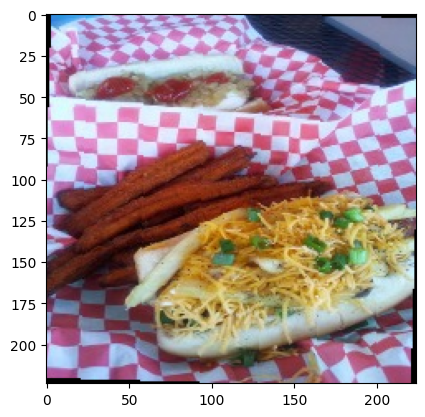

In [ ]:
imshow(training_set[0][0])

In [ ]:
# Set Your Hyperparameters
# Hyperparameters, such as the batch size or learning rate of a model, are parameters that can be adjusted to find the most optimal hyperparameters for the model.

In [ ]:
# For this model, we will set a batch size, learning rate and the number of epochs. The batch size is the number of sample images used in one iteration of training the model, the learning rate is how much the model will change between iterations and the number of epochs is the number of times the model will be trained over the entire dataset.

In [ ]:
# Batch size: train set
batch_size = 50

# Learning rate
lr = 5e-3

# Number epochs
n_epochs = 25

In [ ]:
# Load Your Model!

In [ ]:
from torchvision import models

model = models.resnet18(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 57.9MB/s]


In [ ]:
# The original network was designed for classifying the image to 1,000 different classes. In our case, we only have 2 classes. For that reason, we'll replace the final layer to reduce the number of neurons from 1,000 to 2. Consequently, we'll need to retrain the final layer.
# To achieve this, we'll "freeze" the existing model parameters and replace the final layer.

In [ ]:
from torch.nn import Linear

for param in model.parameters():
    param.requires_grad = False

# Next, we set `n_classes` to the number of classes we have.
# Recall that we have two classes: "hotdog" and "not hotdog".

n_classes = dataset_full.n_classes

# Now that we have those parameters set, we can replace the output layer,
# `model.fc` of the neural network, with a `nn.Linear` object to classify
# `n_classes`'s different classes. For the first parameter, known as **in_features**,
# we input 512 because the second last hidden layer of the neural network
# has 512 neurons.
model.fc = Linear(512, n_classes)

In [ ]:
# Search for the Optimal Model!¶

In [ ]:
# Since this neural network is designed to perform classification tasks, cross entropy loss (a loss function) becomes the natural choice to construct the model.
from torch.nn import CrossEntropyLoss

criterion = CrossEntropyLoss()

In [ ]:
# After defining the loss function, we must find a way to get the parameters that will minimize the loss function. This task is accomplished by optimizers. In our model, we'll use the Adam optimizer,

In [ ]:
from torch.optim import Adam

optimizer = Adam(model.parameters(), lr = lr)

In [ ]:
# Now that we have everything we need to train the model, we can set up our training framework:

In [ ]:
trainer = ClassificationModelTrainer(model,
                                     training_set,
                                     validation_set,
                                     batch_size,
                                     criterion,
                                     optimizer)

In [ ]:

# Let's start training!

In [ ]:
# , we have trained 25 epochs on your behalf on a machine with CUDA GPU. In the following chunk of code, we will load the trained model and training statistics back into this Python runtime, and you will train another three epochs before we stop.

In [ ]:
r = get(f"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/build-a-hotdog-not-hotdog-classifier-guided-project/twenty-five-iters.pt")
f = open(os.path.join(os.getcwd(), "./twenty-five-iters.pt"), mode="wb+")
f.write(r.content)
f.close()

trainer.load_from("./twenty-five-iters.pt")
trainer.train_model(n_epochs = 2)


100%|██████████| 34/34 [03:21<00:00,  5.91s/it, Training Loss=2.65, Validation Accuracy=0.913, Epoch=2]


In [ ]:
# Your model has been trained!

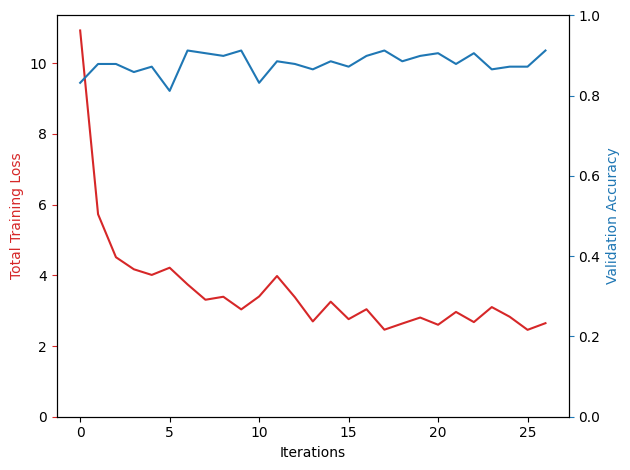

In [ ]:
# There are two curves on this plot, one for the training loss and the other for validation accuracy. Training loss measures how familiar the model is with the data we have provided it for learning. Validation accuracy measures its ability to correctly classify whether an image it has never seen has a hotdog in it or not.
trainer.plot_training_stat()

Here are a list of inaccurately classified results:
Actual: Hot dog		Predicted: Not hot dog


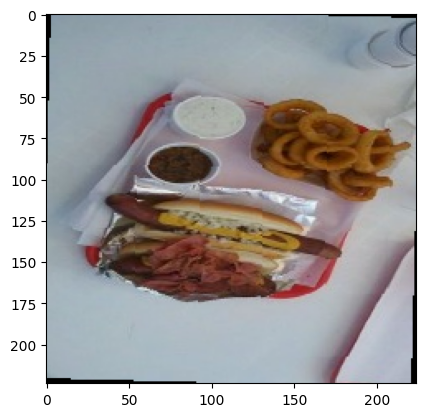

Actual: Hot dog		Predicted: Not hot dog


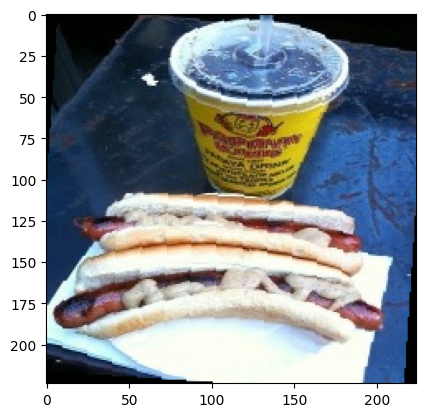

Actual: Not hot dog		Predicted: Hot dog


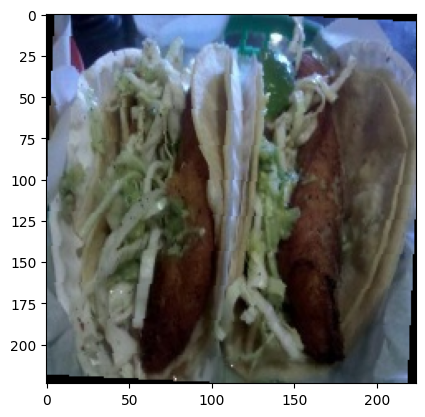

Actual: Hot dog		Predicted: Not hot dog


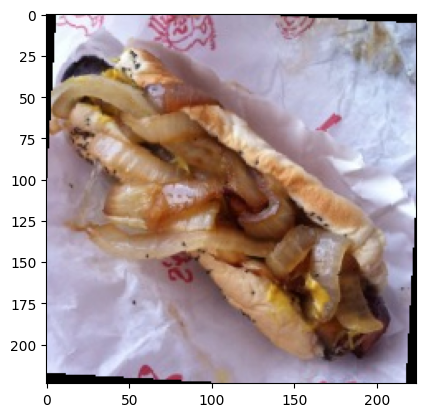

Actual: Not hot dog		Predicted: Hot dog


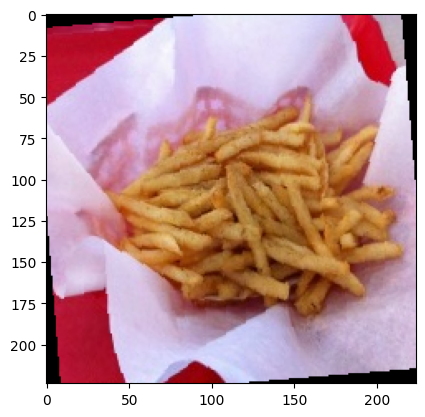

Actual: Hot dog		Predicted: Not hot dog


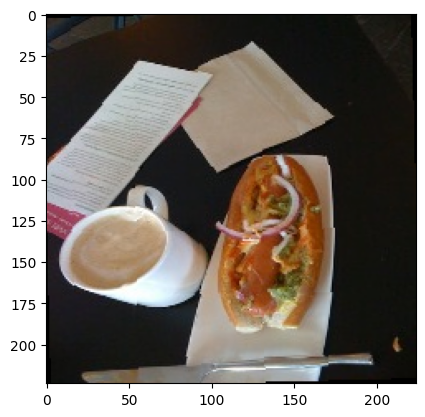

Actual: Hot dog		Predicted: Not hot dog


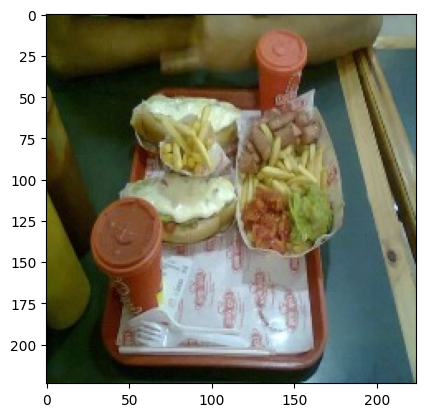

Actual: Hot dog		Predicted: Not hot dog


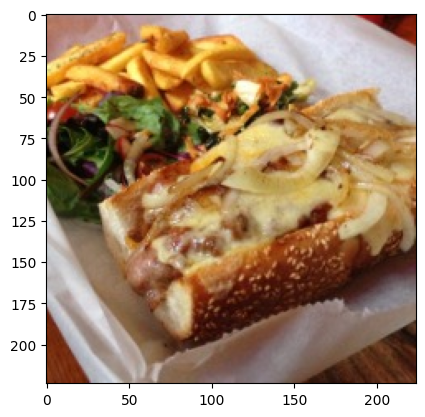

Actual: Not hot dog		Predicted: Hot dog


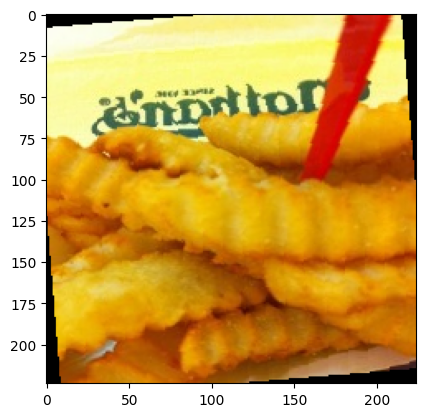

Actual: Hot dog		Predicted: Not hot dog


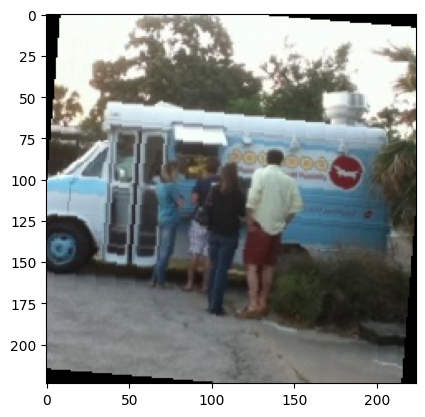

Actual: Hot dog		Predicted: Not hot dog


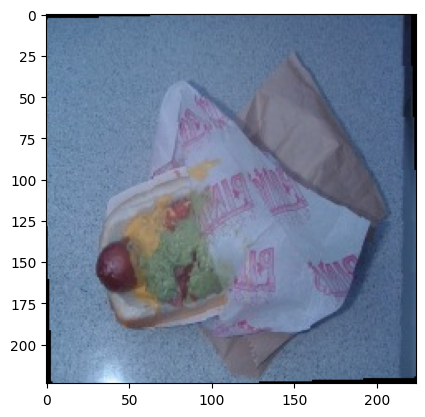

Actual: Hot dog		Predicted: Not hot dog


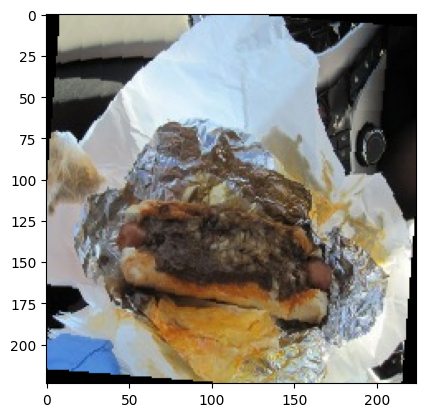

Actual: Hot dog		Predicted: Not hot dog


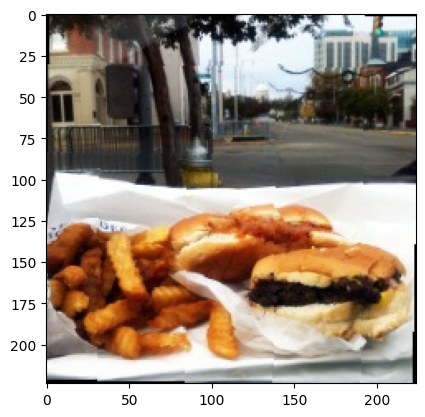

Actual: Hot dog		Predicted: Not hot dog


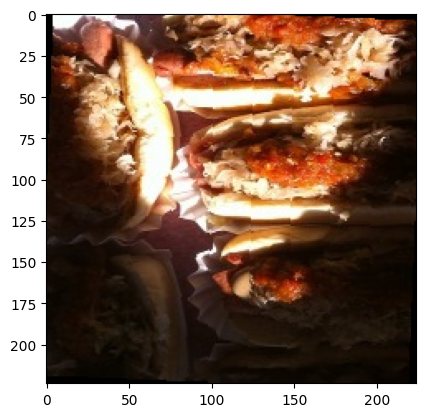

Actual: Not hot dog		Predicted: Hot dog


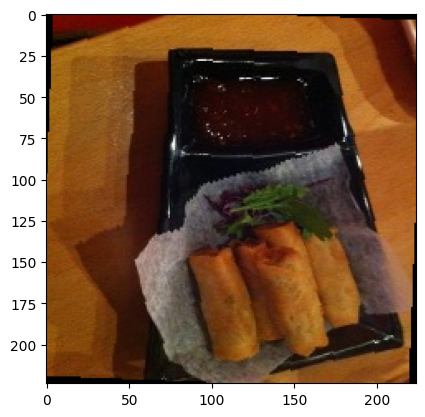

Actual: Not hot dog		Predicted: Hot dog


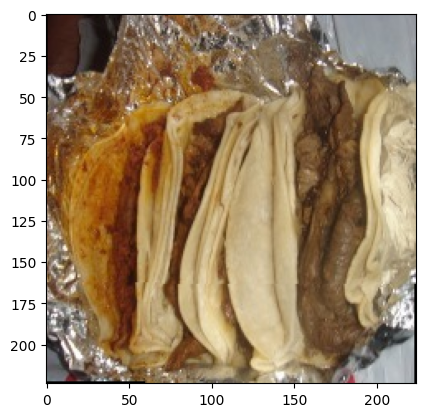

Actual: Not hot dog		Predicted: Hot dog


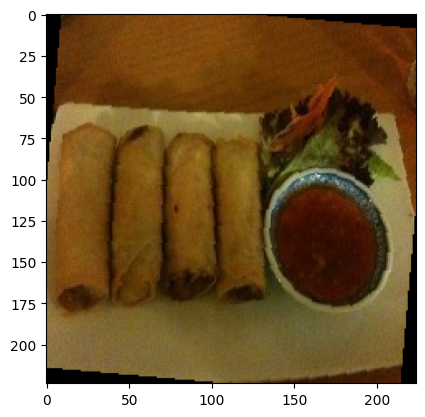

Actual: Hot dog		Predicted: Not hot dog


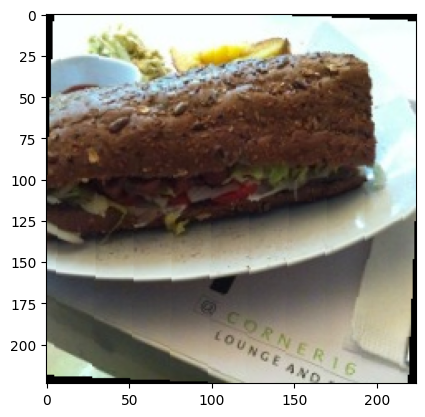

Actual: Hot dog		Predicted: Not hot dog


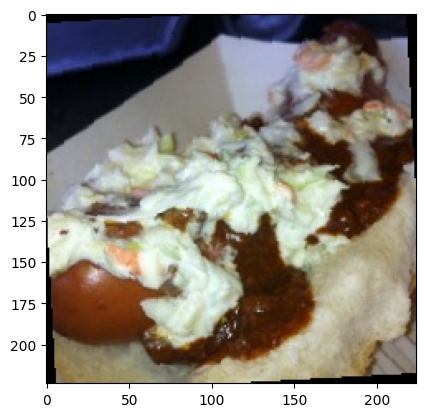

In [ ]:
accuracy = trainer.test(test_set)

In [ ]:
print(f"The model reached an accuracy rate of {accuracy:.2f}% on images it has never seen before.")

The model reached an accuracy rate of 87.42% on images it has never seen before.
